<a href="https://colab.research.google.com/github/mrromaniuc/quantum-computing/blob/main/IBMCertifiedAssociateDeveloperQiskit/05.3-Measure_Fidelity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install qiskit
!pip install qiskit-aer
!pip install qiskit-visualization
!pip install qiskit-ibm-provider
!pip install qiskit-experiments
!pip install imgaug==0.2.5
!pip install pylatexenc

In [41]:
#Setting configuration to use matplotlib in drawings
!mkdir ~/.qiskit
!echo "[default]" > ~/.qiskit/settings.conf
!echo "circuit_drawer = mpl" >> ~/.qiskit/settings.conf
!more ~/.qiskit/settings.conf


#
# Loading IBM credentials
#
API_TOKEN_DIR="/content/drive/'My Drive'/'Colab Notebooks'/QC"
API_TOKEN_FILE="MY_API_TOKEN.txt"

#Mount the google drive first
from google.colab import drive
drive.mount('/content/drive')
#%cd /content/drive/'My Drive'/'Colab Notebooks'/QC
%cd $API_TOKEN_DIR

#Read the MY_API_TOKEN from file...
from qiskit_ibm_provider import IBMProvider
MY_API_TOKEN = ""
with open(API_TOKEN_FILE) as f:
  MY_API_TOKEN=f.readline()
IBMProvider.save_account(MY_API_TOKEN, overwrite=True)

mkdir: cannot create directory ‘/root/.qiskit’: File exists
[default]
circuit_drawer = mpl
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/QC


References:

process fidelity:
* https://qiskit.org/documentation/tutorials/circuits_advanced/02_operators_overview.html

gate fidelity:
* https://youtu.be/KCPuw7UDNag

state fidelity:
* https://youtu.be/M2XLly0EOFk
* https://qiskit.org/documentation/stubs/qiskit.algorithms.state_fidelities.html


## Measure Fidelity - Process Fidelity
This is a way to measure how close two quantum channels are to each other

It does NOT depend on global phases

In [ ]:
#Note that using the comparison, two Operators are not the same if they differ
#by global phase

import numpy as np
from qiskit.quantum_info.operators import Operator

id_matrix = np.array([[1,0],[0,1]])
op1 = Operator(id_matrix)
print(f"Operator 1:\n{op1}")

op2 = -1j*op1
print(f"\nOperator 2:\n{op2}")

print(f"\nIs operator 1 same as 2: {op1 == op2}")

Operator 1:
Operator([[1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j]],
         input_dims=(2,), output_dims=(2,))

Operator 2:
Operator([[0.-1.j, 0.-0.j],
          [0.-0.j, 0.-1.j]],
         input_dims=(2,), output_dims=(2,))

Is operator 1 same as 2: False


In [ ]:
#using process fidelity, the operators are considered the same if they differ
#only by a global phase

import numpy as np
from qiskit.quantum_info import process_fidelity
from qiskit.quantum_info.operators import Operator

xpauli_matrix= np.array([[0,1],[1,0]])
op1 = Operator(xpauli_matrix)
print(f"Operator 1:\n{op1}")

op2 = np.exp(1j*0.5)*op1
print(f"\nOperator 2:\n{op2}")

print(f"\nProcess fidelity = {process_fidelity(op1, op2)}")

Operator 1:
Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))

Operator 2:
Operator([[0.        +0.j        , 0.87758256+0.47942554j],
          [0.87758256+0.47942554j, 0.        +0.j        ]],
         input_dims=(2,), output_dims=(2,))
Process fidelity = 1.0


## Measure Fidelity - Gate Fidelity
Gate fidelity is a measure of how noisy a gate is compared to the ideal gate

In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info.operators import Operator
from qiskit.visualization import array_to_latex
from qiskit_ibm_provider import IBMProvider
from qiskit_experiments.library import ProcessTomography
from qiskit.quantum_info import average_gate_fidelity

qc = QuantumCircuit(1)
qc.h(0)
ideal_hop = Operator(qc)

display(array_to_latex(ideal_hop))

provider = IBMProvider(instance="ibm-q/open/main")
backend  = provider.get_backend("ibmq_quito")

pt = ProcessTomography(qc, physical_qubits=[2]) #Checks gate fidelity on physical qubit 2 in ibm_quito
ptdata = pt.run(backend).block_for_results()
noisy_hop = ptdata.analysis_results("state").value
display(array_to_latex(noisy_hop))

fidelity = average_gate_fidelity(noisy_hop, target=ideal_hop)
print(f"\n\nHadamard gate fidelity in ibm_quito = {fidelity}")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>



Hadamard gate fidelity in ibm_quito = 0.8900416666666665


## Measure Fidelity - State Fidelity - TO BE REVIEWED - DOES NOT WORK ATM
State fidelity is a measure of how noisy the final state of a real circuit is from the ideal final state

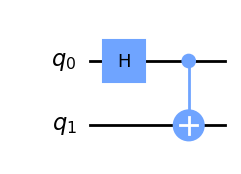

Noise Mode: 
 NoiseModel:
  Basis gates: ['cx', 'delay', 'id', 'measure', 'reset', 'rz', 'sx', 'x']
  Instructions with noise: ['sx', 'reset', 'measure', 'x', 'id', 'cx']
  Qubits with noise: [0, 1, 2, 3, 4]
  Specific qubit errors: [('sx', (0,)), ('sx', (1,)), ('sx', (2,)), ('sx', (3,)), ('sx', (4,)), ('reset', (0,)), ('reset', (1,)), ('reset', (2,)), ('reset', (3,)), ('reset', (4,)), ('x', (0,)), ('x', (1,)), ('x', (2,)), ('x', (3,)), ('x', (4,)), ('id', (0,)), ('id', (1,)), ('id', (2,)), ('id', (3,)), ('id', (4,)), ('cx', (0, 1)), ('cx', (1, 0)), ('cx', (1, 2)), ('cx', (1, 3)), ('cx', (2, 1)), ('cx', (3, 1)), ('cx', (3, 4)), ('cx', (4, 3)), ('measure', (0,)), ('measure', (1,)), ('measure', (2,)), ('measure', (3,)), ('measure', (4,))]

Sv Noisy:
Statevector([-7.08312527e-01+0.j,  0.00000000e+00+0.j,  1.57009027e-16+0.j,
             -7.05898976e-01+0.j],
            dims=(2, 2))

Sv Ideal:
Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
    

In [61]:
from qiskit import QuantumCircuit, Aer
from qiskit_aer.noise import NoiseModel, pauli_error
from qiskit.quantum_info import state_fidelity, Statevector
from qiskit_ibm_provider import IBMProvider



qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
display(qc.draw())

provider = IBMProvider(instance="ibm-q/open/main")
backend = provider.get_backend("ibmq_lima")
noise_model = NoiseModel.from_backend(backend)
print(f"Noise Mode: \n {noise_model}")

backend = Aer.get_backend("statevector_simulator")

job_ideal = backend.run(qc, shots=1)
sv_ideal = job_ideal.result().get_statevector(qc)

job_noisy = backend.run(qc, shots=1, noise_model=noise_model)
sv_noisy = job_noisy.result().get_statevector(qc)

print(f"\nSv Noisy:\n{sv_noisy}")
print(f"\nSv Ideal:\n{sv_ideal}")

f = state_fidelity(sv_ideal, sv_noisy)
print(f"State fidelity on noisy simulator for this circuit = {f}")